In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [4]:
adata = sc.read(
    'D:/UCI Research/CellxGene Tutorial/scRNA-python-workshop-master/scRNA-python-workshop-master/content/data/glioblastoma_raw.h5ad')

In [6]:
print(adata.var.keys())

Index([], dtype='object')


In [7]:
print(adata.obs.keys())

Index(['disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type',
       'neoplastic_state', 'diagnosis'],
      dtype='object')


In [9]:
qc = sc.pp.calculate_qc_metrics(adata)
cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
print(cell_qc_dataframe.head(2))

print('\n\n\n\nThis is the gene quality control dataframe:')
print(gene_qc_dataframe.head(2))

This is the cell quality control dataframe:
            n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
index                                                                  
GSM2243439               1341                 7.201916   159262.3125   
GSM2243444               1456                 7.284135   326321.8750   

            log1p_total_counts  pct_counts_in_top_50_genes  \
index                                                        
GSM2243439           11.978314                   65.554424   
GSM2243444           12.695642                   77.530281   

            pct_counts_in_top_100_genes  pct_counts_in_top_200_genes  \
index                                                                  
GSM2243439                    76.898016                    89.034835   
GSM2243444                    83.443820                    90.526005   

            pct_counts_in_top_500_genes  
index                                    
GSM2243439                    98.116145  
GSM

# # Quality control for cells

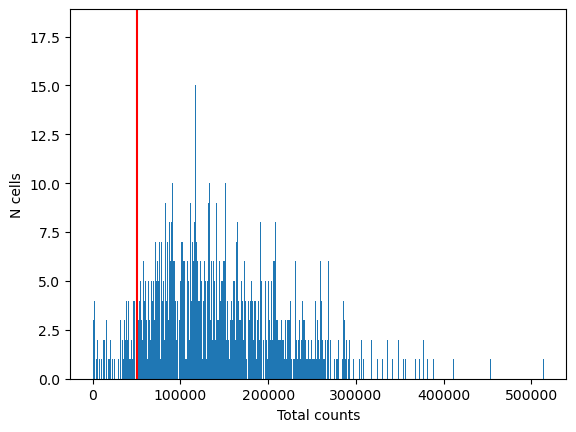

In [33]:
plt.hist(cell_qc_dataframe['total_counts'], bins = 1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color = 'red')

In [34]:
# Set the threshold
count_threshold = 50000

# Get the indices of cells that have total counts above the set threshold
cells_to_keep = cell_qc_dataframe[cell_qc_dataframe['total_counts'] >= count_threshold].index

# Filter the AnnData object to keep only those cells
adata_filtered = adata[cells_to_keep, :]


In [35]:
print("Number of cells before filtering:", adata.n_obs)
print("Number of cells after filtering:", adata_filtered.n_obs)

Number of cells before filtering: 1701
Number of cells after filtering: 1701


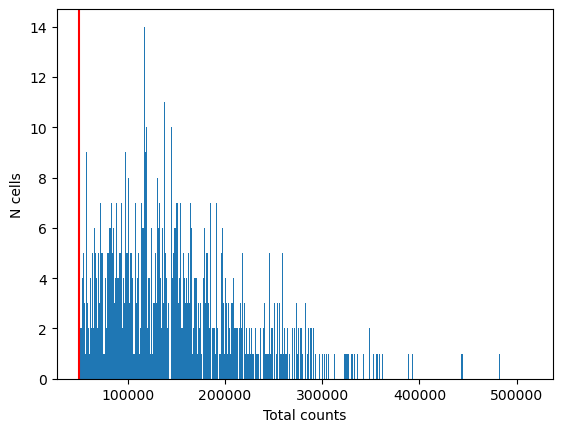

In [36]:
# Recalculate the QC metrics for the filtered data
qc_filtered = sc.pp.calculate_qc_metrics(adata_filtered)
cell_qc_dataframe_filtered = qc_filtered[0]

# Plot the histogram for the filtered data
plt.hist(cell_qc_dataframe_filtered['total_counts'], bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')
plt.axvline(50000, color='red')
plt.show()

# This should remove cell with less than 50,000 reads


# Detected Gene


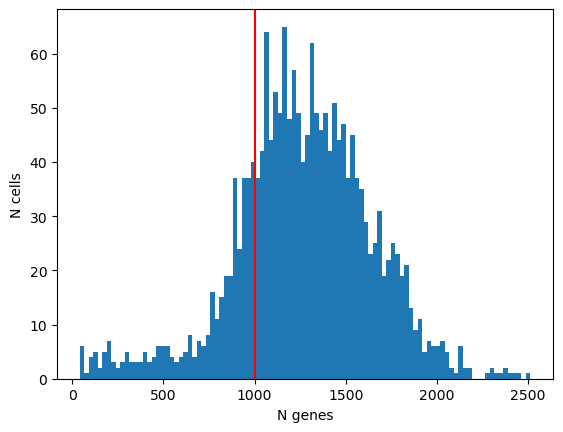

In [30]:
plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')

In [31]:
# Set the threshold
gene_threshold = 1000

# Get the indices of cells that have more than the set threshold of detected genes
cells_above_threshold = cell_qc_dataframe[cell_qc_dataframe['n_genes_by_counts'] >= gene_threshold].index

# Keep only cells that exist in both adata and are above the threshold
cells_to_keep = list(set(adata.obs_names) & set(cells_above_threshold))

# Filter the AnnData object to keep only those cells
adata_filtered = adata[cells_to_keep, :]


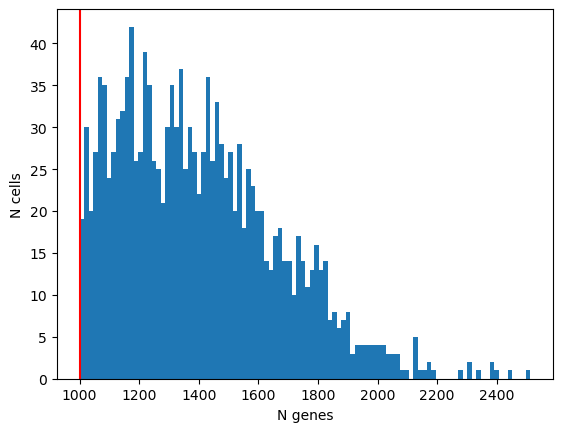

In [32]:
# Recalculate the QC metrics for the filtered data
qc_filtered = sc.pp.calculate_qc_metrics(adata_filtered)
cell_qc_dataframe_filtered = qc_filtered[0]

# Plot the histogram for the filtered data
plt.hist(cell_qc_dataframe_filtered['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axvline(1000, color='red')
plt.show()

# This should remove cell with less than 1000 reads


In [20]:
print(set(cell_qc_dataframe.index) - set(adata.obs_names))
print(set(adata.obs_names) - set(cell_qc_dataframe.index))

{'GSM2246123', 'GSM2246076', 'GSM2245414', 'GSM2245568', 'GSM2246485', 'GSM2245185', 'GSM2245629', 'GSM2246580', 'GSM2244445', 'GSM2246157', 'GSM2246419', 'GSM2245603', 'GSM2246488', 'GSM2245836', 'GSM2245742', 'GSM2245564', 'GSM2246130', 'GSM2246976', 'GSM2243592', 'GSM2243728', 'GSM2246714', 'GSM2245121', 'GSM2244532', 'GSM2244433', 'GSM2246508', 'GSM2246217', 'GSM2246244', 'GSM2246411', 'GSM2245389', 'GSM2245420', 'GSM2245554', 'GSM2244423', 'GSM2245482', 'GSM2246438', 'GSM2246247', 'GSM2245611', 'GSM2246589', 'GSM2245186', 'GSM2246766', 'GSM2245501', 'GSM2245522', 'GSM2246491', 'GSM2246512', 'GSM2243711', 'GSM2246773', 'GSM2243882', 'GSM2246502', 'GSM2244403', 'GSM2246509', 'GSM2246600', 'GSM2244405', 'GSM2245822', 'GSM2245622', 'GSM2247069', 'GSM2245088', 'GSM2245624', 'GSM2245989', 'GSM2245808', 'GSM2246688', 'GSM2246763', 'GSM2246501', 'GSM2246626', 'GSM2246153', 'GSM2244421', 'GSM2244570', 'GSM2245516', 'GSM2246525', 'GSM2246176', 'GSM2245604', 'GSM2246712', 'GSM2244402', 'GSM2

In [37]:
print(cell_qc_dataframe.columns)

Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes'],
      dtype='object')


# Quality control for genes

In [48]:
print(cell_qc_dataframe_filtered.columns)

Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes'],
      dtype='object')


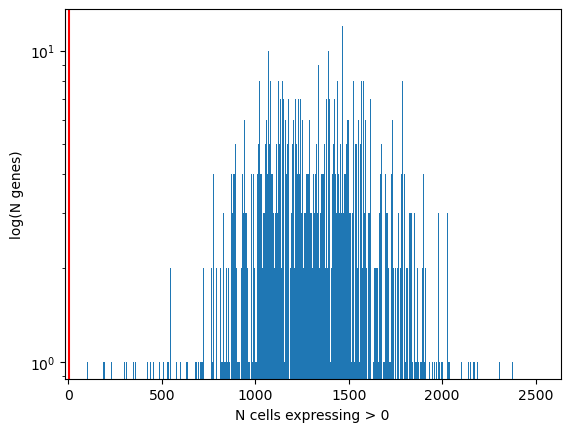

In [47]:
plt.hist(cell_qc_dataframe_filtered['n_genes_by_counts'], bins=1000)
plt.xlabel('N genes expressing > 0')
plt.ylabel('log(N genes)') # for visual clarity
plt.axvline(2, color='red')
plt.yscale('log') 

In [49]:
adata_filtered = adata

In [51]:
adata.write('D:/UCI Research/CellxGene Tutorial/Exercises/brain_qc.h5ad')